# Logistic Regression Using the Gradient Descent


In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from google.colab import files
uploaded = files.upload()

Saving ex2data1.txt to ex2data1.txt


In [3]:
df=pd.read_csv("ex2data1.txt",header=None)
X=df.iloc[:,:-1].values
y=df.iloc[:,-1].values
df.head()

,0,1,2
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [4]:
df.describe()

,0,1,2
count,100.000000,100.000000,100.000000
mean,65.644274,66.221998,0.600000
std,19.458222,18.582783,0.492366
min,30.058822,30.603263,0.000000
25%,50.919511,48.179205,0.000000
50%,67.032988,67.682381,1.000000
75%,80.212529,79.360605,1.000000
max,99.827858,98.869436,1.000000


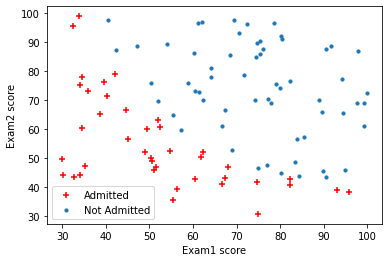

In [5]:
filter1 = df[df[2]==0].iloc[:,:-1].values
filter2 = df[df[2]==1].iloc[:,:-1].values
plt.scatter(filter1[:,0],filter1[:,1],c="r",marker="+")
plt.scatter(filter2[:,0],filter2[:,1],marker="o",s=10)
plt.xlabel("Exam1 score")
plt.ylabel("Exam2 score")
plt.legend(["Admitted","Not Admitted"],loc = 0)

In [0]:
def sigmoid(z):
  return 1/(1+np.exp(-z))

In [0]:
def costFunction(theta,X,y):
  m = len(y)
  predictions = sigmoid(np.dot(X,theta))
  error = (-y * np.log(predictions)) - ((1-y)*np.log(1-predictions))
  cost = 1/m * sum(error)
  grad = 1/m * np.dot(X.transpose(),(predictions - y))

  return cost[0],grad


In [0]:
def featureNormalization(X):
  mean = np.mean(X,axis = 0)
  std = np.std(X,axis=0)
  X_norm = (X-mean)/std
  return X_norm,mean,std
  

In [13]:
m , n = X.shape[0], X.shape[1]
X,X_mean, X_std = featureNormalization(X)
X = np.append(np.ones((m,1)),X,axis = 1)
y = y.reshape(m,1)
initial_theta = np.ones((n+1,1))
cost, grad = costFunction(initial_theta,X,y)
print("Cost: ",cost)
print("Gradient: ", grad)

Cost:  0.3600247632939821
Gradient:  [[ 0.07224269]
 [-0.1145249 ]
 [-0.0870292 ]]


In [0]:
def gradientDescent(X,y,theta,alpha,num_iters):
  m = len(y)
  J_history = []
  for i in range(num_iters):
    cost , grad = costFunction(theta,X,y)
    theta = theta - (alpha*grad)
    J_history.append(cost)
  return theta, J_history

In [22]:
theta, J_history = gradientDescent(X,y,initial_theta,0.01,190000)
print("Final THETAS: ", theta)
print("FINAL COST: ", J_history[-1])

Final THETAS:  [[1.71844025]
 [3.99276789]
 [3.72511742]]
FINAL COST:  0.20349770159186345


Text(0.5, 1.0, 'Cost function using Gradient Descent')

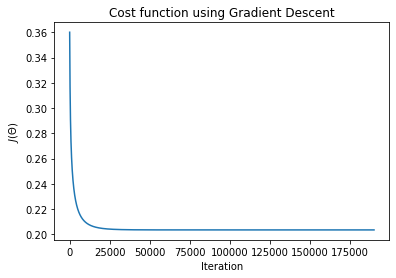

In [23]:
plt.plot(J_history)
plt.xlabel("Iteration")
plt.ylabel("$J(\Theta)$")
plt.title("Cost function using Gradient Descent")

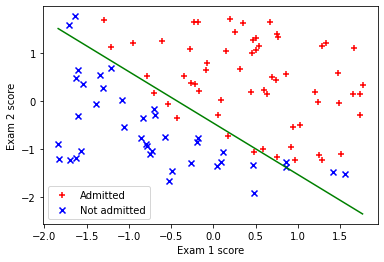

In [24]:
pos , neg = (y==1).reshape(100,1) , (y==0).reshape(100,1)

plt.scatter(X[pos[:,0],1],X[pos[:,0],2],c="r",marker="+",label="Admitted")
plt.scatter(X[neg[:,0],1],X[neg[:,0],2],c="b",marker="x",label="Not admitted")
x_value= np.array([np.min(X[:,1]),np.max(X[:,1])])
y_value=-(theta[0] +theta[1]*x_value)/theta[2]
plt.plot(x_value,y_value, "g")
plt.xlabel("Exam 1 score")
plt.ylabel("Exam 2 score")
plt.legend(loc=0)

In [0]:
def classifierPredict(theta,X):
  predictions = X.dot(theta)
  return predictions>0

In [26]:
x_test = np.array([45,85])
x_test = (x_test - X_mean)/X_std
x_test = np.append(np.ones(1),x_test)
prob = sigmoid(x_test.dot(theta))
print("predicted",prob[0])

predicted 0.7762893740428805


In [27]:
p=classifierPredict(theta,X)
print("Train Accuracy:", sum(p==y)[0],"%")

Train Accuracy: 89 %
